In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
plt.style.use('fivethirtyeight')
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr, ttest_ind, ttest_1samp, norm, mannwhitneyu
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import folium
import folium.plugins
from scipy.stats import t
import warnings 
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
sns.set(style='whitegrid')

In [171]:
terror = pd.read_csv('data/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


In [172]:
log_terror = terror[['iyear', 'country_txt', 'region_txt']].copy()


In [173]:
incidents_year_and_country = log_terror.groupby(['iyear', 'country_txt', 'region_txt']).size().reset_index(name='incident_count')

In [174]:
logi_terror_year = incidents_year_and_country[(incidents_year_and_country['iyear'] >= 2001) & (incidents_year_and_country['iyear'] <= 2017)]


In [175]:
gdp_capita = pd.read_csv('data/per_capita.csv')


In [176]:
gdp_filtered = gdp_capita[(gdp_capita['Year'] >= 2001) & (gdp_capita['Year'] <= 2017)]


In [177]:
gdp_filtered.drop(gdp_filtered.columns[[1, 3, 5, 7]], axis=1, inplace=True)


In [178]:
gdp_filtered

,Entity,Year,GDP per capita,Population (historical estimates)
0,Abkhazia,2015,NaN,NaN
52,Afghanistan,2001,489.6820,19688634.0
53,Afghanistan,2002,796.8166,21000258.0
54,Afghanistan,2003,842.8052,22645136.0
55,Afghanistan,2004,869.0393,23553554.0
...,...,...,...,...
62023,Zimbabwe,2013,1604.0000,13555420.0
62024,Zimbabwe,2014,1594.0000,13855758.0
62025,Zimbabwe,2015,1560.0000,14154937.0
62026,Zimbabwe,2016,1534.0000,14452705.0


In [179]:
import pandas as pd

# Assuming you have the logi_terror_year and gdp_filtered DataFrames

# Merge logi_terror_year into gdp_filtered on 'country_txt' and 'iyear'
gdp_terror = pd.merge(gdp_filtered, logi_terror_year, left_on=['Entity', 'Year'], right_on=['country_txt', 'iyear'], how='left')

# Drop the redundant columns 'country_txt' and 'iyear' (as they are duplicates)
#merged_df.drop(columns=['country_txt', 'iyear'], inplace=True)

# Now merged_df contains the merged result
print(gdp_terror)



           Entity  Year  GDP per capita  Population (historical estimates)  \
0        Abkhazia  2015             NaN                                NaN   
1     Afghanistan  2001        489.6820                         19688634.0   
2     Afghanistan  2002        796.8166                         21000258.0   
3     Afghanistan  2003        842.8052                         22645136.0   
4     Afghanistan  2004        869.0393                         23553554.0   
...           ...   ...             ...                                ...   
4520     Zimbabwe  2013       1604.0000                         13555420.0   
4521     Zimbabwe  2014       1594.0000                         13855758.0   
4522     Zimbabwe  2015       1560.0000                         14154937.0   
4523     Zimbabwe  2016       1534.0000                         14452705.0   
4524     Zimbabwe  2017       1582.3662                         14751101.0   

       iyear  country_txt          region_txt  incident_count  

In [180]:
gdp_terror.isnull().sum()

Entity                                  0
Year                                    0
GDP per capita                       1625
Population (historical estimates)     172
iyear                                3189
country_txt                          3189
region_txt                           3189
incident_count                       3189
dtype: int64

In [181]:
education = pd.read_csv('data/mean-years-of-schooling-long-run.csv')
education_after_2000 = education[(education['Year'] >= 2001) & (education['Year'] <= 2017)]
education_after_2000.rename(columns={
    'Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))': 'education_level'
}, inplace=True)
education_after_2000 = education_after_2000.drop(columns='Code')


In [182]:
education_after_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 35 to 7762
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           3150 non-null   object 
 1   Year             3150 non-null   int64  
 2   education_level  3150 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 98.4+ KB


In [183]:
gdp_terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4525 entries, 0 to 4524
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             4525 non-null   object 
 1   Year                               4525 non-null   int64  
 2   GDP per capita                     2900 non-null   float64
 3   Population (historical estimates)  4353 non-null   float64
 4   iyear                              1336 non-null   float64
 5   country_txt                        1336 non-null   object 
 6   region_txt                         1336 non-null   object 
 7   incident_count                     1336 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 318.2+ KB


In [184]:
inc_gdp_edu = pd.merge(education_after_2000, gdp_terror, left_on=['Entity', 'Year'], right_on=['Entity', 'Year'], how='outer')


In [186]:
inc_gdp_edu

,Entity,Year,education_level,GDP per capita,Population (historical estimates),iyear,country_txt,region_txt,incident_count
0,Afghanistan,2001,2.2,489.6820,19688634.0,2001.0,Afghanistan,South Asia,14.0
1,Afghanistan,2002,2.3,796.8166,21000258.0,2002.0,Afghanistan,South Asia,38.0
2,Afghanistan,2003,2.4,842.8052,22645136.0,2003.0,Afghanistan,South Asia,100.0
3,Afghanistan,2004,2.5,869.0393,23553554.0,2004.0,Afghanistan,South Asia,88.0
4,Afghanistan,2005,2.6,964.4081,24411196.0,2005.0,Afghanistan,South Asia,155.0
...,...,...,...,...,...,...,...,...,...
4520,Yugoslavia,2015,NaN,14971.0000,NaN,NaN,NaN,NaN,NaN
4521,Yugoslavia,2016,NaN,15416.0000,NaN,NaN,NaN,NaN,NaN
4522,Yugoslavia,2017,NaN,15960.8430,NaN,NaN,NaN,NaN,NaN
4523,Zanzibar,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
import pandas as pd

# Assuming you have the inc_gdp_edu DataFrame

# Replace 'NaN' values in the 'incident_count' column with 0
inc_gdp_edu['incident_count'].fillna(0, inplace=True)

# Now, the 'incident_count' column no longer has any 'NaN' values, and they are replaced with 0
print(inc_gdp_edu)


           Entity  Year  education_level  GDP per capita  \
0     Afghanistan  2001              2.2        489.6820   
1     Afghanistan  2002              2.3        796.8166   
2     Afghanistan  2003              2.4        842.8052   
3     Afghanistan  2004              2.5        869.0393   
4     Afghanistan  2005              2.6        964.4081   
...           ...   ...              ...             ...   
4520   Yugoslavia  2015              NaN      14971.0000   
4521   Yugoslavia  2016              NaN      15416.0000   
4522   Yugoslavia  2017              NaN      15960.8430   
4523     Zanzibar  2005              NaN             NaN   
4524     Zanzibar  2015              NaN             NaN   

      Population (historical estimates)   iyear  country_txt  region_txt  \
0                            19688634.0  2001.0  Afghanistan  South Asia   
1                            21000258.0  2002.0  Afghanistan  South Asia   
2                            22645136.0  2003.0  Af

In [188]:
import pandas as pd

# Assuming you have the inc_gdp_edu DataFrame

# Calculate the mean of the 'education_level' column
education_level_mean = inc_gdp_edu['education_level'].mean()

# Replace 'NaN' values in the 'education_level' column with the mean value
inc_gdp_edu['education_level'].fillna(education_level_mean, inplace=True)

# Now, the 'education_level' column no longer has any 'NaN' values, and they are replaced with the mean value
print(inc_gdp_edu)


           Entity  Year  education_level  GDP per capita  \
0     Afghanistan  2001          2.20000        489.6820   
1     Afghanistan  2002          2.30000        796.8166   
2     Afghanistan  2003          2.40000        842.8052   
3     Afghanistan  2004          2.50000        869.0393   
4     Afghanistan  2005          2.60000        964.4081   
...           ...   ...              ...             ...   
4520   Yugoslavia  2015          7.89181      14971.0000   
4521   Yugoslavia  2016          7.89181      15416.0000   
4522   Yugoslavia  2017          7.89181      15960.8430   
4523     Zanzibar  2005          7.89181             NaN   
4524     Zanzibar  2015          7.89181             NaN   

      Population (historical estimates)   iyear  country_txt  region_txt  \
0                            19688634.0  2001.0  Afghanistan  South Asia   
1                            21000258.0  2002.0  Afghanistan  South Asia   
2                            22645136.0  2003.0  Af

In [192]:
inc_gdp_edu.isnull().sum()

Entity                                  0
Year                                    0
education_level                         0
GDP per capita                       1625
Population (historical estimates)     172
iyear                                3189
country_txt                          3189
region_txt                           3189
incident_count                          0
incident_binary                         0
dtype: int64

In [193]:
import pandas as pd

# Assuming you have the inc_gdp_edu DataFrame

# Drop rows with missing values in the 'country_txt' column
inc_gdp_edu.dropna(subset=['GDP per capita'], inplace=True)

# Now, the DataFrame no longer has missing values in the 'country_txt' column
print(inc_gdp_edu.isnull().sum())


Entity                                  0
Year                                    0
education_level                         0
GDP per capita                          0
Population (historical estimates)      92
iyear                                1657
country_txt                          1657
region_txt                           1657
incident_count                          0
incident_binary                         0
dtype: int64


In [194]:
inc_gdp_edu

,Entity,Year,education_level,GDP per capita,Population (historical estimates),iyear,country_txt,region_txt,incident_count,incident_binary
0,Afghanistan,2001,2.20000,489.6820,19688634.0,2001.0,Afghanistan,South Asia,14.0,0
1,Afghanistan,2002,2.30000,796.8166,21000258.0,2002.0,Afghanistan,South Asia,38.0,1
2,Afghanistan,2003,2.40000,842.8052,22645136.0,2003.0,Afghanistan,South Asia,100.0,1
3,Afghanistan,2004,2.50000,869.0393,23553554.0,2004.0,Afghanistan,South Asia,88.0,1
4,Afghanistan,2005,2.60000,964.4081,24411196.0,2005.0,Afghanistan,South Asia,155.0,1
...,...,...,...,...,...,...,...,...,...,...
4518,Yugoslavia,2013,7.89181,14500.0000,NaN,NaN,NaN,NaN,0.0,0
4519,Yugoslavia,2014,7.89181,14627.0000,NaN,NaN,NaN,NaN,0.0,0
4520,Yugoslavia,2015,7.89181,14971.0000,NaN,NaN,NaN,NaN,0.0,0
4521,Yugoslavia,2016,7.89181,15416.0000,NaN,NaN,NaN,NaN,0.0,0


In [163]:
inc_gdp_edu.dropna(subset=['Population (historical estimates)'], inplace=True)


In [243]:
countries_with_wars = ['Afghanistan', 'Pakistan', 'Iraq', 'Somalia', 'Yemen', 'Syria']
# Exclude rows with countries in the dataset
filter_countries = ~inc_gdp_edu['country_txt'].isin(countries_with_wars)
excluded = inc_gdp_edu[filter_countries]


In [244]:
excluded

,Entity,Year,education_level,GDP per capita,Population (historical estimates),iyear,country_txt,region_txt,incident_count,incident_binary,GDP_squared
17,Albania,2001,8.70000,5285.8090,3153615.0,2001.0,Albania,Eastern Europe,1.0,0,2.793978e+07
18,Albania,2002,9.00000,5608.9624,3123554.0,NaN,NaN,NaN,0.0,0,3.146046e+07
19,Albania,2003,9.00000,6004.6450,3092993.0,2003.0,Albania,Eastern Europe,1.0,0,3.605576e+07
20,Albania,2004,9.10000,6419.8706,3062629.0,NaN,NaN,NaN,0.0,0,4.121474e+07
21,Albania,2005,9.10000,6858.4670,3032636.0,NaN,NaN,NaN,0.0,0,4.703857e+07
...,...,...,...,...,...,...,...,...,...,...,...
4518,Yugoslavia,2013,7.89181,14500.0000,NaN,NaN,NaN,NaN,0.0,0,2.102500e+08
4519,Yugoslavia,2014,7.89181,14627.0000,NaN,NaN,NaN,NaN,0.0,0,2.139491e+08
4520,Yugoslavia,2015,7.89181,14971.0000,NaN,NaN,NaN,NaN,0.0,0,2.241308e+08
4521,Yugoslavia,2016,7.89181,15416.0000,NaN,NaN,NaN,NaN,0.0,0,2.376531e+08


In [245]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

# Create a binary target variable based on mean incident count
median_incident_count = excluded['incident_count'].median()
excluded['incident_binary'] = (excluded['incident_count'] > mean_incident_count).astype(int)

# Define predictors and target variable
logistic_X = excluded[['education_level', 'GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logistic_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logistic_model.summary())

# Make predictions on the test set
y_pred = logistic_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.675834
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        incident_binary   No. Observations:                 2258
Model:                          Logit   Df Residuals:                     2255
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                0.002038
Time:                        19:52:41   Log-Likelihood:                -1526.0
converged:                       True   LL-Null:                       -1529.2
Covariance Type:            nonrobust   LLR p-value:                   0.04430
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3606      0.043     -8.418      0.000      -0.445      -0.277
x1             0.1269      0.

In [246]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# Assuming you have the final_data DataFrame

# Create a binary target variable based on mean incident count
mean_incident_count = excluded['incident_count'].median()
excluded['incident_binary'] = (excluded['incident_count'] > mean_incident_count).astype(int)

# Define predictors and target variable
logistic_X = excluded[['GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class with fewer neighbors
smote = SMOTE(k_neighbors=2, random_state=42)  # Reduce k_neighbors to 2 or less
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logistic_model = sm.Logit(y_train_resampled, sm.add_constant(X_train_resampled)).fit()
print(logistic_model.summary())

# Make predictions on the test set
y_pred = logistic_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:        incident_binary   No. Observations:                 2660
Model:                          Logit   Df Residuals:                     2658
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:               6.143e-05
Time:                        19:52:59   Log-Likelihood:                -1843.7
converged:                       True   LL-Null:                       -1843.8
Covariance Type:            nonrobust   LLR p-value:                    0.6341
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.084e-05      0.039      0.002      0.998      -0.076       0.076
x1             0.0187      0.

In [296]:
mean_incident_count

16.893730074388948

In [297]:
median_incident_count

0.0

In [295]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# Assuming you have the final_data DataFrame

# Create a binary target variable based on mean incident count
mean_incident_count = excluded['incident_count'].mean()
excluded['incident_binary'] = (excluded['incident_count'] > mean_incident_count).astype(int)

# Define predictors and target variable
logistic_X = excluded[['education_level', 'GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class with fewer neighbors
smote = SMOTE(k_neighbors=2, random_state=42)  # Reduce k_neighbors to 2 or less
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logistic_model = sm.Logit(y_train_resampled, sm.add_constant(X_train_resampled)).fit()
print(logistic_model.summary())

# Make predictions on the test set
y_pred = logistic_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.50).astype(int)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.692608
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        incident_binary   No. Observations:                 3958
Model:                          Logit   Df Residuals:                     3955
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:               0.0007782
Time:                        20:10:18   Log-Likelihood:                -2741.3
converged:                       True   LL-Null:                       -2743.5
Covariance Type:            nonrobust   LLR p-value:                    0.1182
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.032     -0.047      0.962      -0.064       0.061
x1             0.0785      0.

In [288]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# Assuming you have the final_data DataFrame

# Create a binary target variable based on mean incident count
mean_incident_count = inc_gdp_edu['incident_count'].mean()
inc_gdp_edu['incident_binary'] = (inc_gdp_edu['incident_count'] > mean_incident_count).astype(int)

# Define predictors and target variable
logistic_X = inc_gdp_edu[['GDP per capita', 'education_level']]
logistic_y = inc_gdp_edu['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class with fewer neighbors
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logistic_model = sm.Logit(y_train_resampled, sm.add_constant(X_train_resampled)).fit()
print(logistic_model.summary())

# Make predictions on the test set
y_pred = logistic_model.predict(sm.add_constant(X_test))
y_pred_binary = (y_pred > 0.51).astype(int)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.674464
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        incident_binary   No. Observations:                 4160
Model:                          Logit   Df Residuals:                     4157
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                 0.02695
Time:                        20:09:18   Log-Likelihood:                -2805.8
converged:                       True   LL-Null:                       -2883.5
Covariance Type:            nonrobust   LLR p-value:                 1.759e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0657      0.032     -2.038      0.042      -0.129      -0.003
x1            -0.2996      0.

In [222]:
inc_gdp_edu['incident_count'].mean()

35.357241379310345

In [221]:
inc_gdp_edu

,Entity,Year,education_level,GDP per capita,Population (historical estimates),iyear,country_txt,region_txt,incident_count,incident_binary,GDP_squared
0,Afghanistan,2001,2.20000,489.6820,19688634.0,2001.0,Afghanistan,South Asia,14.0,1,2.397885e+05
1,Afghanistan,2002,2.30000,796.8166,21000258.0,2002.0,Afghanistan,South Asia,38.0,1,6.349167e+05
2,Afghanistan,2003,2.40000,842.8052,22645136.0,2003.0,Afghanistan,South Asia,100.0,1,7.103206e+05
3,Afghanistan,2004,2.50000,869.0393,23553554.0,2004.0,Afghanistan,South Asia,88.0,1,7.552293e+05
4,Afghanistan,2005,2.60000,964.4081,24411196.0,2005.0,Afghanistan,South Asia,155.0,1,9.300830e+05
...,...,...,...,...,...,...,...,...,...,...,...
4518,Yugoslavia,2013,7.89181,14500.0000,NaN,NaN,NaN,NaN,0.0,0,2.102500e+08
4519,Yugoslavia,2014,7.89181,14627.0000,NaN,NaN,NaN,NaN,0.0,0,2.139491e+08
4520,Yugoslavia,2015,7.89181,14971.0000,NaN,NaN,NaN,NaN,0.0,0,2.241308e+08
4521,Yugoslavia,2016,7.89181,15416.0000,NaN,NaN,NaN,NaN,0.0,0,2.376531e+08


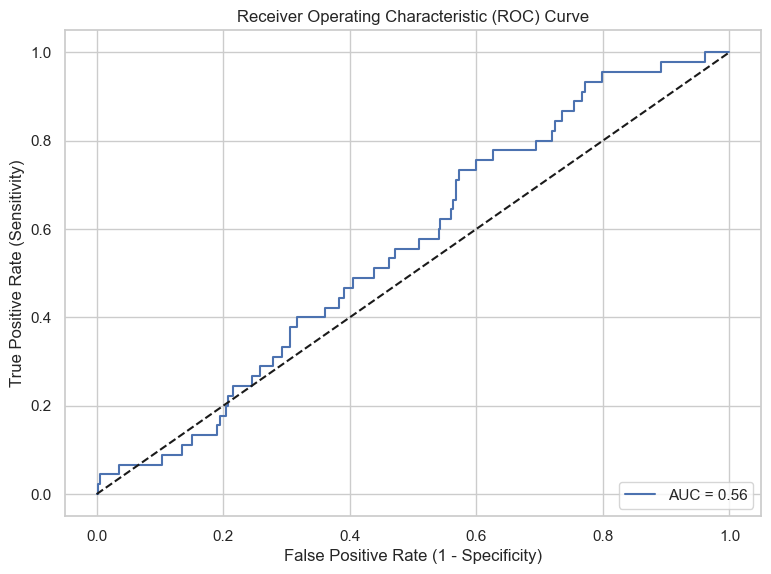

Confusion Matrix:
[[520   0]
 [ 45   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       520
           1       0.00      0.00      0.00        45

    accuracy                           0.92       565
   macro avg       0.46      0.50      0.48       565
weighted avg       0.85      0.92      0.88       565



In [248]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the inc_gdp_edu DataFrame

# Create a binary target variable based on mean incident count
#mean_incident_count = inc_gdp_edu['incident_count'].median()
#inc_gdp_edu['incident_binary'] = (inc_gdp_edu['incident_count'] > mean_incident_count).astype(int)
excluded['incident_binary'] = (excluded['incident_count'] > 35).astype(int)
# Define predictors and target variable
logistic_X = excluded[['GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


In [229]:
inc_gdp_edu

,Entity,Year,education_level,GDP per capita,Population (historical estimates),iyear,country_txt,region_txt,incident_count,incident_binary,GDP_squared
0,Afghanistan,2001,2.20000,489.6820,19688634.0,2001.0,Afghanistan,South Asia,14.0,0,2.397885e+05
1,Afghanistan,2002,2.30000,796.8166,21000258.0,2002.0,Afghanistan,South Asia,38.0,1,6.349167e+05
2,Afghanistan,2003,2.40000,842.8052,22645136.0,2003.0,Afghanistan,South Asia,100.0,1,7.103206e+05
3,Afghanistan,2004,2.50000,869.0393,23553554.0,2004.0,Afghanistan,South Asia,88.0,1,7.552293e+05
4,Afghanistan,2005,2.60000,964.4081,24411196.0,2005.0,Afghanistan,South Asia,155.0,1,9.300830e+05
...,...,...,...,...,...,...,...,...,...,...,...
4518,Yugoslavia,2013,7.89181,14500.0000,NaN,NaN,NaN,NaN,0.0,0,2.102500e+08
4519,Yugoslavia,2014,7.89181,14627.0000,NaN,NaN,NaN,NaN,0.0,0,2.139491e+08
4520,Yugoslavia,2015,7.89181,14971.0000,NaN,NaN,NaN,NaN,0.0,0,2.241308e+08
4521,Yugoslavia,2016,7.89181,15416.0000,NaN,NaN,NaN,NaN,0.0,0,2.376531e+08


In [249]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

excluded['incident_binary'] = (excluded['incident_count'] > 35).astype(int)
# Define predictors and target variable
logistic_X = excluded[['education_level', 'GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[197 323]
 [  9  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.54       520
           1       0.10      0.80      0.18        45

    accuracy                           0.41       565
   macro avg       0.53      0.59      0.36       565
weighted avg       0.89      0.41      0.51       565



In [250]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

excluded['incident_binary'] = (excluded['incident_count'] > 35).astype(int)

# Define predictors and target variable
logistic_X = excluded[['education_level', 'GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Apply Random Oversampling to balance the class distribution
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the ROC curve and the AUC score
y_probs = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print(f"\nAUC Score: {roc_auc:.2f}")


Confusion Matrix:
[[206 314]
 [  9  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.40      0.56       520
           1       0.10      0.80      0.18        45

    accuracy                           0.43       565
   macro avg       0.53      0.60      0.37       565
weighted avg       0.89      0.43      0.53       565


AUC Score: 0.57


In [251]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

excluded['incident_binary'] = (excluded['incident_count'] > 35).astype(int)

# Define predictors and target variable
logistic_X = excluded[['education_level', 'GDP per capita']]
logistic_y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
logistic_X_scaled = scaler.fit_transform(logistic_X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(logistic_X_scaled, logistic_y, test_size=0.2, random_state=42)

# Apply Random Undersampling to balance the class distribution
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the ROC curve and the AUC score
y_probs = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

print(f"\nAUC Score: {roc_auc:.2f}")


Confusion Matrix:
[[200 320]
 [  9  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.55       520
           1       0.10      0.80      0.18        45

    accuracy                           0.42       565
   macro avg       0.53      0.59      0.36       565
weighted avg       0.89      0.42      0.52       565


AUC Score: 0.57


In [252]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

excluded['incident_binary'] = (excluded['incident_count'] > 35).astype(int)

# Define predictors and target variable
X = excluded[['education_level', 'GDP per capita']]
y = excluded['incident_binary']

# Scale the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

# Apply ADASYN to oversample the minority class
adasyn = ADASYN(random_state=42)
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data using SMOTE
logistic_model_smote = LogisticRegression()
logistic_model_smote.fit(X_train_resampled_smote, y_train_resampled_smote)

# Fit the logistic regression model on the resampled data using ADASYN
logistic_model_adasyn = LogisticRegression()
logistic_model_adasyn.fit(X_train_resampled_adasyn, y_train_resampled_adasyn)

# Make predictions on the test set using SMOTE
y_pred_smote = logistic_model_smote.predict(X_test)

# Make predictions on the test set using ADASYN
y_pred_adasyn = logistic_model_adasyn.predict(X_test)

# Evaluate the models using SMOTE
print("SMOTE Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("\nSMOTE Classification Report:")
print(classification_report(y_test, y_pred_smote))
print("\nSMOTE AUC Score:", roc_auc_score(y_test, logistic_model_smote.predict_proba(X_test)[:, 1]))

# Evaluate the models using ADASYN
print("\nADASYN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adasyn))
print("\nADASYN Classification Report:")
print(classification_report(y_test, y_pred_adasyn))
print("\nADASYN AUC Score:", roc_auc_score(y_test, logistic_model_adasyn.predict_proba(X_test)[:, 1]))


SMOTE Confusion Matrix:
[[197 323]
 [  9  36]]

SMOTE Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.54       520
           1       0.10      0.80      0.18        45

    accuracy                           0.41       565
   macro avg       0.53      0.59      0.36       565
weighted avg       0.89      0.41      0.51       565


SMOTE AUC Score: 0.5658119658119658

ADASYN Confusion Matrix:
[[188 332]
 [  8  37]]

ADASYN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.36      0.53       520
           1       0.10      0.82      0.18        45

    accuracy                           0.40       565
   macro avg       0.53      0.59      0.35       565
weighted avg       0.89      0.40      0.50       565


ADASYN AUC Score: 0.5647008547008547


In [ ]:
output_excel_file = 'inc_gdp_edu.xlsx'
inc_gdp_edu.to_excel(output_excel_file, index=False)

In [253]:
excluded.isnull().sum()

Entity                                  0
Year                                    0
education_level                         0
GDP per capita                          0
Population (historical estimates)      92
iyear                                1657
country_txt                          1657
region_txt                           1657
incident_count                          0
incident_binary                         0
GDP_squared                             0
dtype: int64

In [254]:
excluded

,Entity,Year,education_level,GDP per capita,Population (historical estimates),iyear,country_txt,region_txt,incident_count,incident_binary,GDP_squared
17,Albania,2001,8.70000,5285.8090,3153615.0,2001.0,Albania,Eastern Europe,1.0,0,2.793978e+07
18,Albania,2002,9.00000,5608.9624,3123554.0,NaN,NaN,NaN,0.0,0,3.146046e+07
19,Albania,2003,9.00000,6004.6450,3092993.0,2003.0,Albania,Eastern Europe,1.0,0,3.605576e+07
20,Albania,2004,9.10000,6419.8706,3062629.0,NaN,NaN,NaN,0.0,0,4.121474e+07
21,Albania,2005,9.10000,6858.4670,3032636.0,NaN,NaN,NaN,0.0,0,4.703857e+07
...,...,...,...,...,...,...,...,...,...,...,...
4518,Yugoslavia,2013,7.89181,14500.0000,NaN,NaN,NaN,NaN,0.0,0,2.102500e+08
4519,Yugoslavia,2014,7.89181,14627.0000,NaN,NaN,NaN,NaN,0.0,0,2.139491e+08
4520,Yugoslavia,2015,7.89181,14971.0000,NaN,NaN,NaN,NaN,0.0,0,2.241308e+08
4521,Yugoslavia,2016,7.89181,15416.0000,NaN,NaN,NaN,NaN,0.0,0,2.376531e+08


In [255]:
# Define independent & dependent variable
X = excluded[['education_level', 'GDP per capita']]
y = excluded['incident_count']
# Fit the multiple linear regression model due to having two independent variables
model = sm.OLS(y, X).fit()
# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         incident_count   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              63.28
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    1.31e-27
Time:                        19:56:53   Log-Likelihood:                         -16247.
No. Observations:                2823   AIC:                                  3.250e+04
Df Residuals:                    2821   BIC:                                  3.251e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

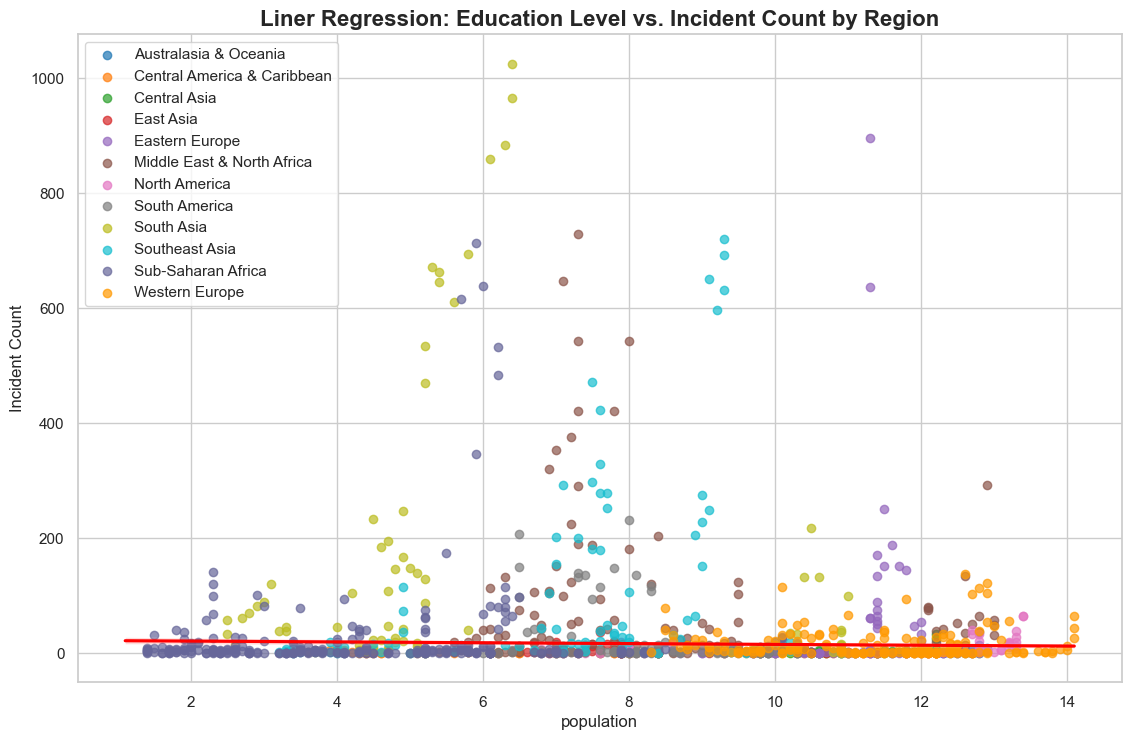

In [256]:
# Linear regression "GDP per capita" and "incident_count"

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#666699', '#ff9900']

selected_data = excluded.groupby('region_txt')

# Scatter plot by regions
plt.figure(figsize=(12, 8))
for i, (region, group) in enumerate(selected_data):
    education_level = group['education_level']
    incident_count = group['incident_count']
    plt.scatter(education_level, incident_count, alpha=0.7, label=region, color=colors[i])

# Regression line
sns.regplot(x=excluded['education_level'], y=excluded['incident_count'], scatter=False, color='red')

plt.xlabel('population')
plt.ylabel('Incident Count')
plt.title('Liner Regression: Education Level vs. Incident Count by Region', fontsize = 16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()